# Các mô hình ngẫu nhiên và ứng dụng
## Đề tài: Học tăng cường
## Giảng viên hướng dẫn: TS. Nguyễn Thị Ngọc Anh
## Sinh viên thực hiện:
* Phùng Trọng Hiếu
* Cao Đăng Sao
* Nguyễn Mạnh Cường
* Ninh Ngọc Luyên
---

![RL](https://www.learndatasci.com/documents/14/Reinforcement-Learning-Animation.gif)

Minh họa đơn giản về quá trình học trong học tăng cường (Reinforcement Learning)

# Bài toán
## Chiếc taxi thông minh

Ta có một chiếc taxi được trang bị các cảm biến, trí tuệ nhân tạo, ... để có thể tự vận hành trong mọi điều kiện giao thông và thời tiết. Nhiệm vụ của chiếc xe này là đón và trả khách tại những vị trí nhất định. Ngoài ra, việc vận chuyển hành khách cần phải thỏa mãn những tiêu chí sau:
* Phải trả khách tại đúng vị trí được chỉ định
* Tiết kiệm thời gian cho hành khách một cách tối đa
* Đảm bảo hành khách được an toàn và phải tuân thủ tất cả các luật giao thông được đưa ra
---

# Mô hình hóa bài toán
Trước khi có thể sử dụng các kỹ thuật học tăng cường để huấn luyện cho chiếc taxi (agent của chúng ta) thực hiện công việc đưa đón khách một cách tự động, ta cần phải quan tâm đến một vài khía cạnh về việc mô hình hóa bài toán. Ta cần phải biết phần thưởng (rewards), không gian trạng thái (state space) của chiếc taxi, và các hành động (actions) mà chiếc taxi có thể thực hiện tại mỗi trạng thái.

## Phần thưởng
Vì chiếc taxi sẽ được huấn luyện bằng cách thử và sai khi tương tác với môi trường, ta cần phải định nghĩa phần thưởng và/hoặc hình phạt cho nó:
* Chiếc taxi (agent) sẽ nhận được một phần thưởng lớn (+20 điểm) khi trả khách thành công (trả đúng vị trí được đưa ra)
* Chiếc taxi sẽ bị phạt nặng nếu nó trả khách sai vị trí (-10 điểm)
* Chiếc taxi sẽ bị phạt "nhẹ" (slight negative reward) trong suốt chuyến hành trình đi đến vị trí trả khách (-1 điểm/bước). Hình phạt ở đây không được lớn vì ta không muốn việc chiếc taxi cố gắng "lao" đến đích một cách nhanh nhất có thể mà vi phạm luật giao thông hay gây nguy hiểm cho hành khách.

## Không gian trạng thái
Không gian trạng thái là tập chứa tất cả những tình huống mà chiếc taxi của chúng ta có thể gặp phải. Đây là nơi chứa những thông tin vô cùng cần thiết cho chiếc taxi để giúp nó có thể đưa ra những hành động "đúng" tương ứng với trạng thái mà nó đang ở.

Giả sử, ta có một bãi tập cho chiếc taxi của chúng ta; ở đây, ta sẽ dạy chiếc taxi vận chuyển hành khách đến các vị trí (R, G, Y, B) trên bãi tập.

![Training area](https://storage.googleapis.com/lds-media/images/Reinforcement_Learning_Taxi_Env.width-1200.png)

Để đơn giản hóa bài toán, ta có một số giả định như sau:
* Chiếc taxi là phương tiện duy nhất có trên bãi tập
* Khu vực huấn luyện có thể được chia thành một lưới 5x5, cho ta tổng cộng 25 vị trí mà chiếc taxi có thể đỗ. Ví dụ, như ta có thể thấy trên hình vẽ, chiếc taxi đang nằm tại vị trí có tọa độ (3, 1); ngoài ra 4 vị trí R, G, Y, B có tọa độ lần lượt là (0,0), (0,4), (4,0), (4,3); vị hành khách đáng kính đang đứng tại vị trí Y và có mong muốn di chuyển đến vị trí R trên bãi tập.

Vậy, ta có tổng cộng 5x5=25 vị trí mà chiếc taxi có thể xuất hiện, 4 đích đến, và 5 vị trí của hành khách (4 vị trí tại R, G, Y, B và 1 vị trí là ở trên chiếc taxi). Tổng số trạng thái có thể có của môi trường sẽ là 5×5×5×4=500 trạng thái.

## Hành động
Tại mỗi thời điểm, chiếc taxi (agent của bài toans) sẽ nằm ở 1 trong tổng 500 trạng thái, và nó sẽ thực hiện một hành động tương ứng với trạng thái hiện có. Hành động ở đây có thể là đón/trả khách, và di chuyển quanh bãi tập.

Không gian hành động của ta sẽ gồm:
* Đi lên
* Đi xuống
* Đi sang trái
* Đi sang phải
* Đón khách
* Trả khách

Để ý rằng, tại một số trạng thái ta không thể thực hiện một vài hành động nhất định. Ví dụ như khi chiếc taxi ở vị trí mép tường bên trái, nó không thể thực hiện hành động đi sang trái; ta có thể giải quyết vấn đề này bằng việc phạt chiếc taxi khi rơi vào tình huống đó (tình huống bị "đâm" và tường) và giữ nguyên vị trí hiện tại của nó.

---

# Nạp các thư viện cần thiết

In [0]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import random
from time import sleep
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm

In [2]:
# Tạo môi trường
env = gym.make("Taxi-v3").env

# Hiển thị kết quả của một frame
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



# Các ký hiệu
* Khối chữ nhật màu vàng: Chiếc taxi của bài toán (lúc chưa có hành khách)
* Khối chữ nhật màu xanh: Chiếc taxi có chứa hành khách
* Các ký tự '|' và '-': Tường chắn
* R, G, Y, B: 4 vị trí đón và trả khách
* Vị trí có màu xanh: Vị trí hành khách đang đứng
* vị trí có màu tím: Đích đến mong muốn của hành khách

In [3]:
# In ra không gian hành động và không gian trạng thái của môi trường
print("Không gian hành động: {}".format(env.action_space))
print("Không gian trạng thái: {}".format(env.observation_space))

Không gian hành động: Discrete(6)
Không gian trạng thái: Discrete(500)


## Không gian hành động
* 0: Đi xuống
* 1: Đi lên
* 2: Đi sang phải
* 3: Đi sang trái
* 4: Đón khách
* 5: Trả khách

## Không gian trạng thái
500 trạng thái như được trình bày ở trên

In [4]:
# Khởi tạo lại trạng thái ban đầu như trong hình ảnh minh họa ở trên
# Các tham số tương ứng: (giá trị hàng của taxi, giá trị cột của taxi, vị trí hành khách, đích đến)
state = env.encode(3, 1, 2, 0)
print("Trạng thái hiện tại:", state)

# Đặt lại trạng thái cho môi trường
env.s = state
env.render()

Trạng thái hiện tại: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [5]:
# In ra bảng phần thưởng tương ứng với trạng thái hiện tại
# Cấu trúc của bảng: {action: [(probability, nextstate, reward, done)]}
env.P[env.s]

# Lưu ý:
# Nếu chiếc taxi thực hiện hành động có index=3 (đi sang trái),
# nó sẽ không di chuyển vì gặp bức tường và vẫn bị trừ 1 điểm
# như một hình phạt cho việc đâm vào tường

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [0]:
# Khởi tạo Q-table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Huấn luyện chiếc taxi (agent)

Cấu hình các siêu tham số

In [0]:
alpha = 0.1
gamma = 0.6
epsilon = 0.1

decay_rate = 0.99

In [8]:
all_epochs = []
all_penalties = []
all_total_rewards = []
frames = [] # Chứa tất cả các frame sinh ra trong suốt quá trình huấn luyện

# Thực hiện việc huấn luyện chiếc taxi trong 100000 episodes
for i in tqdm(range(1, 100001)):
    state = env.reset() # Khởi tạo lại môi trường để bắt đầu một episode mới

    epochs, penalties, total_rewards = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            # Khám phá không gian hành động
            # bằng việc lấy mẫu ngẫu nhiên hành động tiếp theo
            action = env.action_space.sample()
        else:
            # Khai thác các giá trị đã học từ Q-table,
            # chọn hành động cho ta kết quả tốt nhất khi xét về lâu về dài
            action = np.argmax(q_table[state])

        next_state, reward, done, info = env.step(action)
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        # Cập nhật lại Q-value
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        total_rewards += reward

        # Lưu lại frame hiện tại
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            }
        )

    all_epochs.append(epochs)
    all_penalties.append(penalties)
    all_total_rewards.append(total_rewards)

    if i % 1000 == 0:
        # Giảm learning rate theo thời gian
        alpha *= decay_rate

print("Hoàn thành việc huấn luyện.\n")


Hoàn thành việc huấn luyện.



In [9]:
# In kết quả học được tại một trạng thái trong Q-table
q_table[328]

array([-2.38542986, -2.27325184, -2.39750592, -2.3444045 , -9.81873452,
       -8.90265216])

Trực quan hóa kết quả trả về trong quá trình huấn luyện

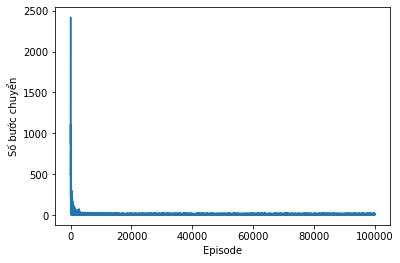

In [10]:
plt.plot(all_epochs)
plt.xlabel('Episode')
plt.ylabel('Số bước chuyển')
plt.show()

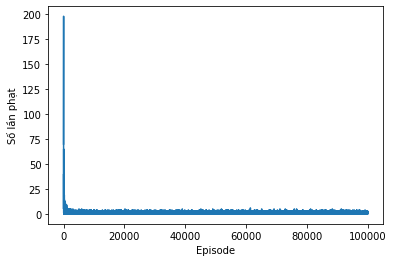

In [11]:
plt.plot(all_penalties)
plt.xlabel('Episode')
plt.ylabel('Số lần phạt')
plt.show()

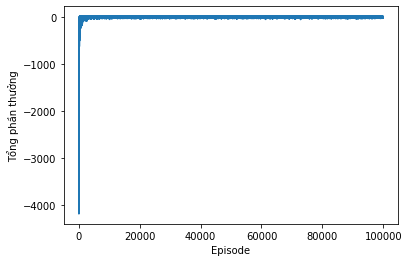

In [12]:
plt.plot(all_total_rewards)
plt.xlabel('Episode')
plt.ylabel('Tổng phần thưởng')
plt.show()

Vẽ một vài frame trong quá trình huấn luyện

In [0]:
num_frames_per_sec = 2

In [14]:
# Lấy 50 frames đầu tiên (giai đoạn đầu của quá trình huấn luyện)
selected_frames = frames[:50]

for i, frame in enumerate(selected_frames):
    print(frame['frame'])
    print(f"Frame thứ {i + 1}")
    print(f"Trạng thái: {frame['state']}")
    print(f"Hành động: {frame['action']}")
    print(f"Phần thưởng: {frame['reward']}")
    sleep(1/num_frames_per_sec)
    clear_output(wait=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Frame thứ 50
Trạng thái: 373
Hành động: 1
Phần thưởng: -1


In [15]:
# Lấy 50 frames cuối cùng (giai đoạn cuối của quá trình huấn luyện)
selected_frames = frames[-50:]

for i, frame in enumerate(selected_frames):
    print(frame['frame'])
    print(f"Frame thứ {i + 1}")
    print(f"Trạng thái: {frame['state']}")
    print(f"Hành động: {frame['action']}")
    print(f"Phần thưởng: {frame['reward']}")
    sleep(1/num_frames_per_sec)
    clear_output(wait=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Frame thứ 50
Trạng thái: 475
Hành động: 5
Phần thưởng: 20


# Đánh giá hiệu quả của chiếc taxi sau quá trình huấn luyện

In [16]:
total_epochs, total_penalties = 0, 0
episodes = 1000

for _ in tqdm(range(episodes)):
    state = env.reset()
    epochs, penalties = 0, 0
    
    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Kết quả sau {episodes} episodes")
print(f"Số bước chuyển trung bình mỗi episode: {total_epochs / episodes}")
print(f"Giá trị phạt trung bình mỗi episode: {total_penalties / episodes}")


Kết quả sau 1000 episodes
Số bước chuyển trung bình mỗi episode: 13.079
Giá trị phạt trung bình mỗi episode: 0.0
